 ## Importing necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from pandasql import sqldf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the datasets

In [9]:
df1 = pd.read_csv("data_outliers_handled_kmeans_imputed.csv")
df1


,Unnamed: 0,age_ma,Feature,Ti,La,Ce,Pr,Nd,Sm,Eu,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,0,222.00,0.0,7.88,0.050,10.500,0.050,4.25000,11.60000,1.99000,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2737.00000,12390.0,305.0,134.0
1,1,222.00,0.0,10.90,1.555,61.505,0.725,7.74125,12.56125,2.64375,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12591.0,503.0,272.0
2,2,222.00,0.0,6.00,0.020,25.100,0.300,4.41000,12.56125,2.30000,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12724.0,639.0,414.0
3,3,222.00,0.0,9.06,0.280,12.000,0.070,1.88000,5.08000,1.01000,...,194.00000,83.0000,356.00000,89.5000,762.000,144.00000,1832.00000,12894.0,308.0,127.0
4,4,222.00,0.0,4.93,0.070,16.500,0.150,2.32000,8.23000,1.52000,...,257.00000,106.1375,437.54375,97.8675,936.000,171.00000,2355.00000,12535.0,348.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,2983,150.31,0.0,14.02,0.010,8.000,0.050,0.83000,1.75000,0.27000,...,40.90000,14.6000,65.30000,14.9000,137.000,24.80000,448.00000,8803.0,92.0,66.0
2984,2984,55.92,0.0,6.83,0.010,9.000,0.140,2.00000,3.76000,0.52000,...,69.50000,23.4000,102.90000,21.9000,199.000,34.70000,725.00000,8854.0,100.0,90.0
2985,2985,76.25,0.0,10.09,0.020,9.000,0.170,2.82000,4.31000,0.53000,...,69.20000,22.9000,99.70000,21.2000,191.000,33.00000,693.00000,8890.0,97.0,86.0
2986,2986,127.39,0.0,6.26,0.000,8.000,0.040,0.70000,1.56000,0.23000,...,34.20000,12.5000,58.20000,12.9000,123.000,21.90000,394.00000,9032.0,82.0,55.0


In [12]:
X = df1.drop(columns = ['Feature', 'Unnamed: 0'])
y = df1['Feature']

In [13]:
X.head()

,age_ma,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,7.88,0.050,10.500,0.050,4.25000,11.60000,1.99000,61.600,23.4975,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2737.00000,12390.0,305.0,134.0
1,222.0,10.90,1.555,61.505,0.725,7.74125,12.56125,2.64375,63.555,23.4975,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12591.0,503.0,272.0
2,222.0,6.00,0.020,25.100,0.300,4.41000,12.56125,2.30000,63.555,23.4975,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12724.0,639.0,414.0
3,222.0,9.06,0.280,12.000,0.070,1.88000,5.08000,1.01000,33.800,15.5000,194.00000,83.0000,356.00000,89.5000,762.000,144.00000,1832.00000,12894.0,308.0,127.0
4,222.0,4.93,0.070,16.500,0.150,2.32000,8.23000,1.52000,45.600,19.7000,257.00000,106.1375,437.54375,97.8675,936.000,171.00000,2355.00000,12535.0,348.0,155.0


In [14]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feature, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [17]:
type(X_train)

pandas.core.frame.DataFrame

In [18]:
y_train.shape

(2390,)

In [19]:
y_train.sum()

1055.0

### Perform scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [24]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
y_pred = lr_model.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
accuracy_score(y_test, y_pred)

0.862876254180602

In [28]:
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[288,  64],
       [ 18, 228]])

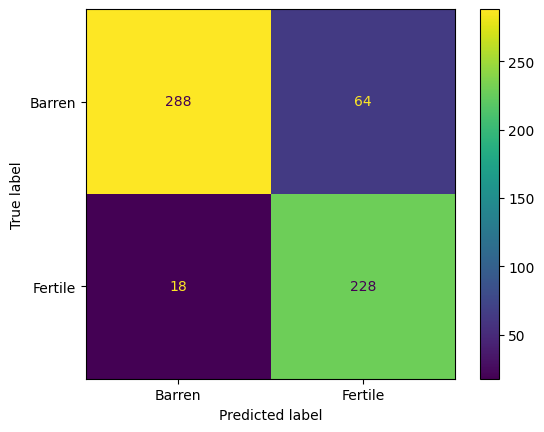

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

In [33]:
from sklearn.metrics import classification_report

target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9412    0.8182    0.8754       352
   Fertility     0.7808    0.9268    0.8476       246

    accuracy                         0.8629       598
   macro avg     0.8610    0.8725    0.8615       598
weighted avg     0.8752    0.8629    0.8639       598



## Feature Importance and Selection

### Recurssive Feature Elimination

In [34]:
from sklearn.feature_selection import RFE

# Initialize Logistic Regression model
lr_model = LogisticRegression()

# Initialize RFE
rfe = RFE(lr_model, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_})
feature_ranking.sort_values(by='Rank')


,Feature,Rank
10,Dy,1
12,Er,2
11,Ho,3
8,Gd,4
5,Nd,5
7,Eu,6
16,Y,7
17,Hf,8
4,Pr,9
1,Ti,10


### Random Forest Feature Importance

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit Random Forest
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,age_ma,0.180122
5,Nd,0.090772
17,Hf,0.089007
4,Pr,0.080381
7,Eu,0.069906
6,Sm,0.066026
18,U,0.055998
10,Dy,0.049997
19,Th,0.043340
3,Ce,0.039914


## Logistic Regression Model implemenation using important features

In [36]:
# Select important features based on importance scores
important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']

In [37]:
# Filter the dataset to include only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

In [38]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [39]:
# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [42]:
# Display confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[291  61]
 [ 21 225]]

Accuracy: 0.862876254180602


In [43]:
conf_matrix

array([[291,  61],
       [ 21, 225]])

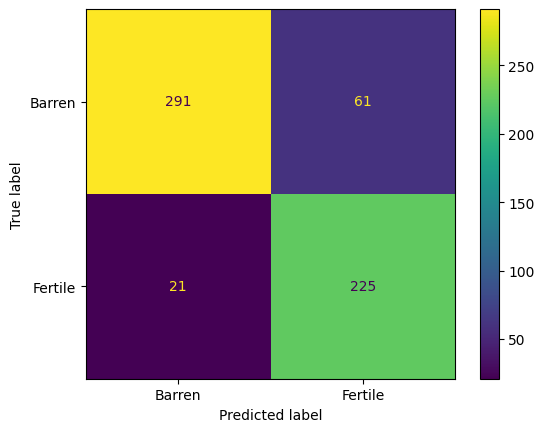

In [44]:
ConfusionMatrixDisplay(conf_matrix, display_labels=['Barren', 'Fertile']).plot()

In [45]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9327    0.8267    0.8765       352
   Fertility     0.7867    0.9146    0.8459       246

    accuracy                         0.8629       598
   macro avg     0.8597    0.8707    0.8612       598
weighted avg     0.8726    0.8629    0.8639       598



## Support Vector Machine

In [46]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()



In [47]:
# Fit SVM model on the selected features
svm_model.fit(X_train_scaled, y_train)



SVC()

In [49]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)



In [50]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)



Support Vector Machine Model:
Confusion Matrix:
[[310  42]
 [  8 238]]

Accuracy: 0.9163879598662207


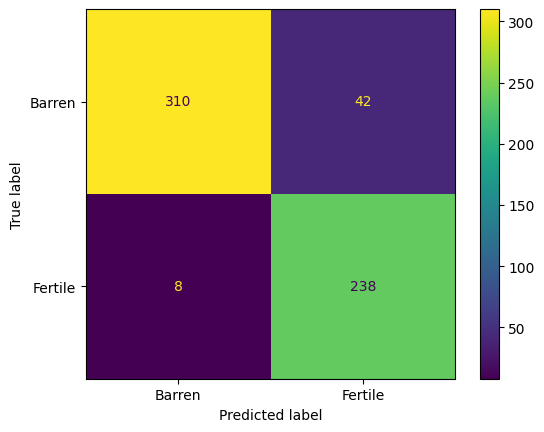

In [51]:
# Display confusion matrix and accuracy
print("Support Vector Machine Model:")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("\nAccuracy:", accuracy_svm)

# Plot confusion matrix
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=['Barren', 'Fertile']).plot()


## Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()


In [53]:
# Fit Decision Tree model on the selected features
dt_model.fit(X_train_scaled, y_train)



DecisionTreeClassifier()

In [54]:
# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)



In [55]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)



Decision Tree Model:
Confusion Matrix:
[[343   9]
 [ 14 232]]

Accuracy: 0.9615384615384616


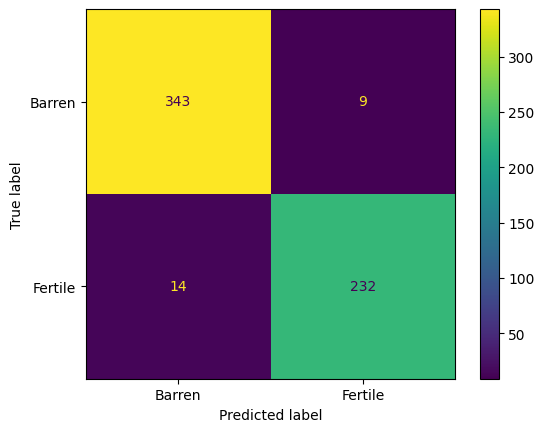

In [56]:
# Display confusion matrix and accuracy
print("Decision Tree Model:")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("\nAccuracy:", accuracy_dt)

# Plot confusion matrix
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=['Barren', 'Fertile']).plot()



## Random Forest Classifier Model

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()



In [58]:
# Fit Random Forest model on the selected features
rf_model.fit(X_train_scaled, y_train)



RandomForestClassifier()

In [59]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)



In [60]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)



Random Forest Model:
Confusion Matrix:
[[340  12]
 [ 14 232]]

Accuracy: 0.9565217391304348


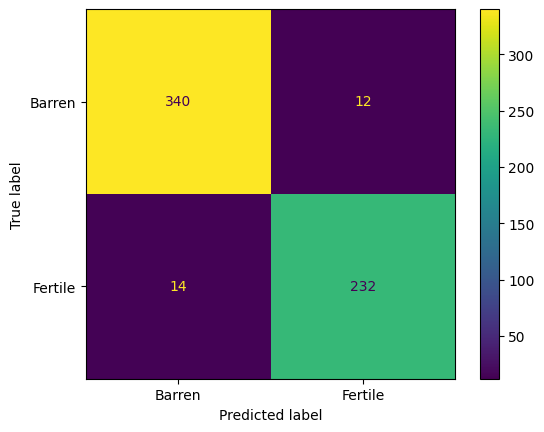

In [61]:
# Display confusion matrix and accuracy
print("Random Forest Model:")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nAccuracy:", accuracy_rf)

# Plot confusion matrix
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=['Barren', 'Fertile']).plot()
